In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [59]:
from sklearn.datasets import make_regression

In [60]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('Output/lumid_25_60.csv')
df.head()

,TIMEPOINT,NAME,ENTRY,CONDITION,PRODUCT,Sample-Number,Lot
0,0,Deamidation,1.9,25_60,Lumab,213819,42268
1,1,Deamidation,2.2,25_60,Lumab,213827,42268
2,3,Deamidation,2.0,25_60,Lumab,213830,42268
3,6,Deamidation,3.4,25_60,Lumab,213833,42268
4,0,Deamidation,2.0,25_60,Lumab,211117,42267


In [61]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = df.TIMEPOINT.values.reshape(-1, 1)
y = df.ENTRY.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (18, 1) (18, 1)


array([[0],
       [1],
       [3],
       [6],
       [0],
       [1],
       [3],
       [6],
       [0],
       [1],
       [3],
       [6],
       [3],
       [6],
       [0],
       [3],
       [6],
       [0]], dtype=int64)

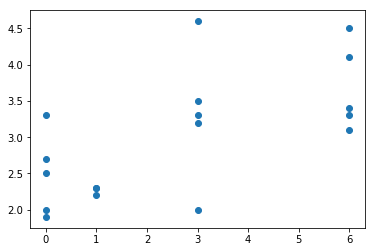

In [62]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [63]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### END SOLUTION

In [64]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

### BEGIN SOLUTION

model = LinearRegression()

### END SOLUTION

In [65]:
# Fit the model to train the data. 
# Note: This is the training step where you fit the line to the data.

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Print the coefficient and the intercept for the model

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
### END SOLUTION

Weight coefficients:  [[0.22876448]]
y-axis intercept:  [2.36312741]


In [67]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[6]]


In [68]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

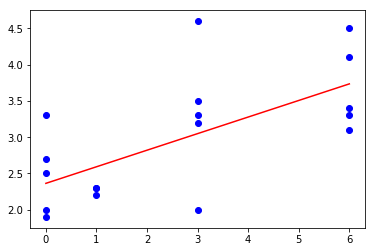

In [69]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
### END SOLUTION

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.38321460042502514
R-squared (R2 ): 0.42121233200770003


In [71]:
# Overall Score for the model
model.score(X, y)

0.4212123320077

In [72]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 0.10229843025595937
R-squared (R2 ): 0.5383644844045155


In [73]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

0.5383644844045155